# Mini project

The datasets I use in this mini project are my own. The dataset contains a total of 480 images of new John lewis products, including 96 images of furniture and 384 images of clothing. Here is the dataset link： https://www.kaggle.com/datasets/zhouhangliao/images

## Refining the dataset

The dataset at the beginning only had links to 384 images of clothing. To expand the dataset, I used web scraper to get another 96 furniture images from john lewis' website. I am going to use the 384 clothing images as the TRAIN and the 96 furniture images as the TEST.

#### 1. Complete the missing part of the image link

In [ ]:
import pandas as pd

# read the CSV file from the URL
df = pd.read_csv('C:/Users/廖周航/Desktop/furniture.csv', encoding='ISO-8859-1')

# add "https://" before all data in the Images column
df['Images'] = 'https:' + df['images-src'].astype(str)

# save the modified CSV file to your desktop
df.to_csv('C:/Users/廖周航/Desktop/furniture2.csv', index=False)

#### 2. Download all images

In [ ]:
import os
import requests
path=os.getcwd()+'\\John lewis dataset\\'   #Set the path to the image file, provided that the folder is present
import pandas as pd
df = pd.read_csv('C:/Users/廖周航/Desktop/furniture2.csv', encoding='ISO-8859-1')
 

In [ ]:
urls=df['Images']



for i in range(len(urls)):
    print(i)
   # url = 'http://pic.qiushibaike.com/system/avtnew/3239/32395436/thumb/20171013142058.JPEG?imageView2/1/w/90/h/90'
    r = requests.request('get',urls[i])  #Get the web
    print(r.status_code)
    
    with open(path+str('furniture_')+str(i)+'.jpg','wb') as f:  #Open the binary file written to the path path and return a handle named f
        f.write(r.content)  #Write a binary file of r objects to f
    f.close()

## Image Classification (CNN - Keras).

This is a classification of images based on what Terence has taught in class and what I have learned on kaggle.

This is the reference link:

https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras

https://git.arts.ac.uk/tbroad/AI-4-Media-22-23/blob/main/Week%203.1%20Convolutional%20Neural%20Networks/Week%203.1%20image%20classification%20from%20scratch.ipynb

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

### 1. Load the dataset:

In [16]:
image_size = (150, 150)
batch_size = 128
num_classes = 2
dataset_path = 'C:/Users/廖周航/mycode/John lewis dataset'

train = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
)

validation = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
)

Found 480 files belonging to 2 classes.
Using 384 files for training.
Found 480 files belonging to 2 classes.
Using 96 files for validation.


### 2. Visualize the data：

1 is in the furniture category. 2 is in the clothing category.

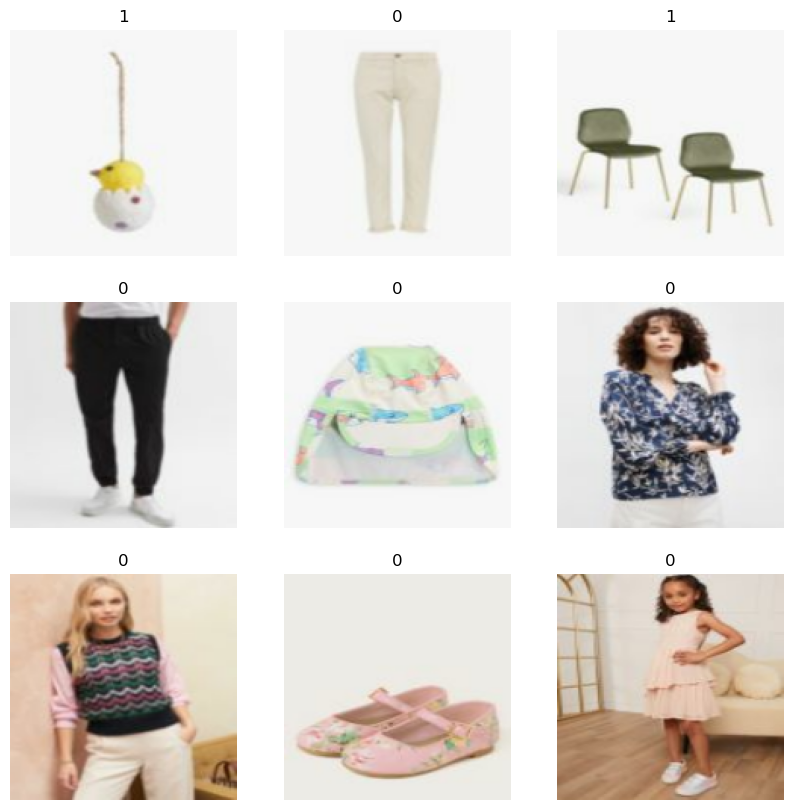

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### 3. Define the CNN model：

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=image_size+(3,)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

### 4. Compile the model：

In [19]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 5. Train the model:

In [20]:
epochs = 10
history = model.fit(train, epochs=epochs, validation_data=validation)

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 1.3369 - accuracy: 0.6094 - val_loss: 0.5517 - val_accuracy: 0.7708
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 0.5671 - accuracy: 0.8073 - val_loss: 0.5540 - val_accuracy: 0.7708
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.5573 - accuracy: 0.8073 - val_loss: 0.5902 - val_accuracy: 0.7708
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 0.5125 - accuracy: 0.8073 - val_loss: 0.5264 - val_accuracy: 0.7708
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 0.4754 - accuracy: 0.8073 - val_loss: 0.5289 - val_accuracy: 0.7708
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 0.4608 - accuracy: 0.8073 - val_loss: 0.4796 - val_accuracy: 0.7708
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.4492 - accuracy: 0.8073 - val_loss: 0.4319 - val_accuracy: 0.7708
Epoch 8/10
3/3 [=========================

In [14]:

tf.saved_model.save(model, 'classifer_from_scratch.model')


INFO:tensorflow:Assets written to: classifer_from_scratch.model\assets


INFO:tensorflow:Assets written to: classifer_from_scratch.model\assets


### 6. Plot the training and validation accuracy and loss curves

Here I use line graphs to represent the relationship between training and validation. This is because I have learnt through my studies that line graphs are commonly used to visualise accuracy and loss between training and validation in image classification tasks.

Reference links :https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras

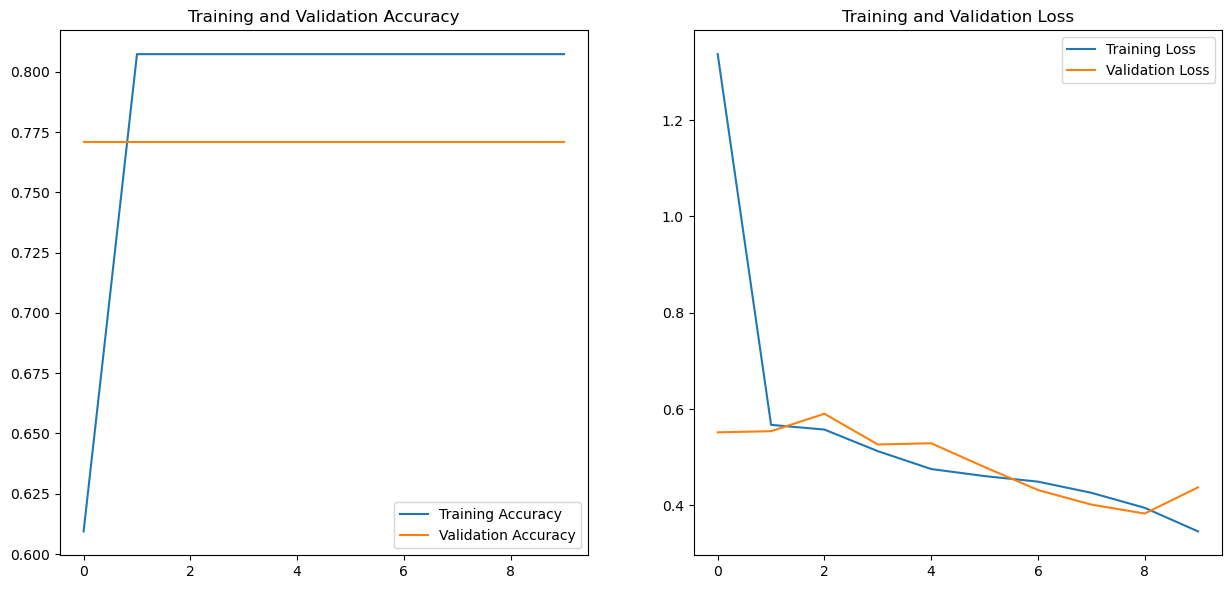

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


It can be seen from the image that the accuracy of image classification through CNN-Keras is still relatively low and unstable. The data of Training Accuracy is basically stable at 0.8, which I think is relatively low. And Validation Accuracy is stable below 0.775, which is lower than I expected. So it is more necessary to further use using transfer learning to classify images.

Although Training and Validation Loss is in a downward trend, it is still very high from the data alone, which also proves that this model needs to be improved.

## Image classification using transfer learning

The code refers to the content of the 3.1 course.

Reference link:https://git.arts.ac.uk/tbroad/AI-4-Media-22-23/blob/main/Week%203.1%20Convolutional%20Neural%20Networks/Week%203.1%20transfer%20learning%20for%20image%20classification%20solutions.ipynb

https://www.kaggle.com/code/rohitgadhwar/image-classification-using-cnn-transfer-learning

### Load your dataset and Visualize the data

I'm not sure if this step needs to be done again, but I ran it anyway just in case.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [6]:
image_size = (150, 150)
batch_size = 128
num_classes = 2
dataset_path = 'C:/Users/廖周航/mycode/John lewis dataset'

train = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
)

validation = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
)

Found 480 files belonging to 2 classes.
Using 384 files for training.
Found 480 files belonging to 2 classes.
Using 96 files for validation.


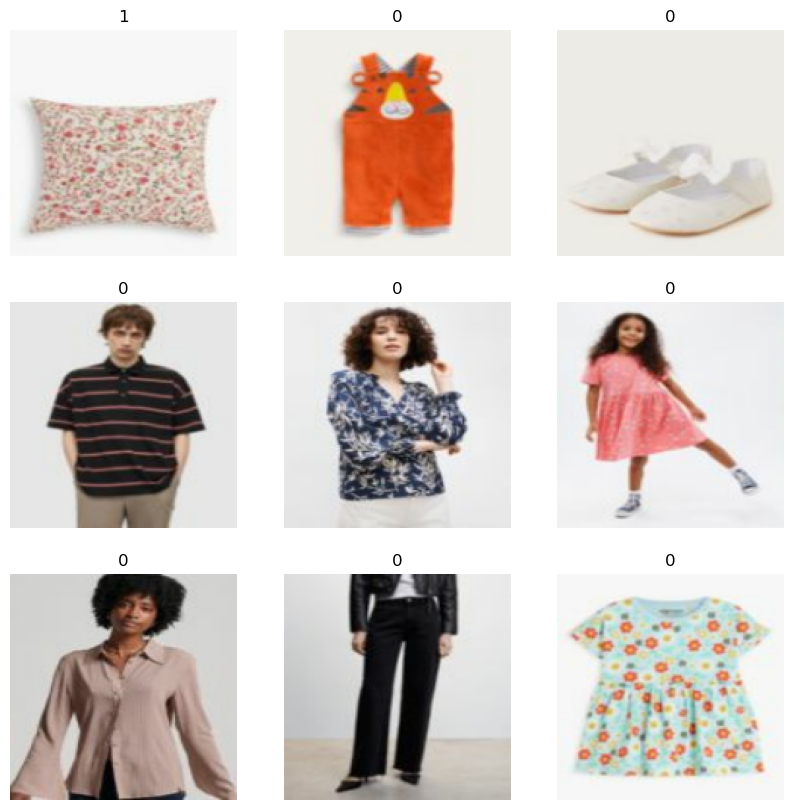

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Load existing model

In [12]:
#Change MobileNet for EfficientNet
base_model = keras.applications.EfficientNetB0(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [13]:
base_model.trainable = False

In [14]:

inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
if num_classes == 2:
    outputs = keras.layers.Dense(1)(x)
else:
    outputs = keras.layers.Dense(num_classes)(x)
model = keras.Model(inputs, outputs)

### Train the model

In [16]:
epochs = 10
if num_classes == 2:
    loss_function = "binary_crossentropy"
else:
    loss_function = "categorical_crossentropy"

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=loss_function,
    metrics=["accuracy"],
)
model.fit(
    train,
    epochs=epochs,
    validation_data=validation,
)

Epoch 1/10
3/3 [==============================] - 9s 2s/step - loss: 0.2653 - accuracy: 0.9766 - val_loss: 0.2337 - val_accuracy: 0.9583
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 0.2191 - accuracy: 0.9818 - val_loss: 0.0912 - val_accuracy: 0.9583
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 0.2113 - accuracy: 0.9844 - val_loss: 0.0791 - val_accuracy: 0.9583
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 0.2048 - accuracy: 0.9870 - val_loss: 0.0722 - val_accuracy: 0.9583
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 0.2024 - accuracy: 0.9870 - val_loss: 0.0687 - val_accuracy: 0.9583
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.2013 - accuracy: 0.9870 - val_loss: 0.0666 - val_accuracy: 0.9583
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.2007 - accuracy: 0.9870 - val_loss: 0.0655 - val_accuracy: 0.9583
Epoch 8/10
3/3 [=========================

### Save the model
The tf saving method is adopted here.

In [121]:
tf.saved_model.save(model, 'classifier_transfer_learned')


INFO:tensorflow:Assets written to: classifier_transfer_learned\assets


INFO:tensorflow:Assets written to: classifier_transfer_learned\assets


### Plot the training and validation accuracy and loss curves

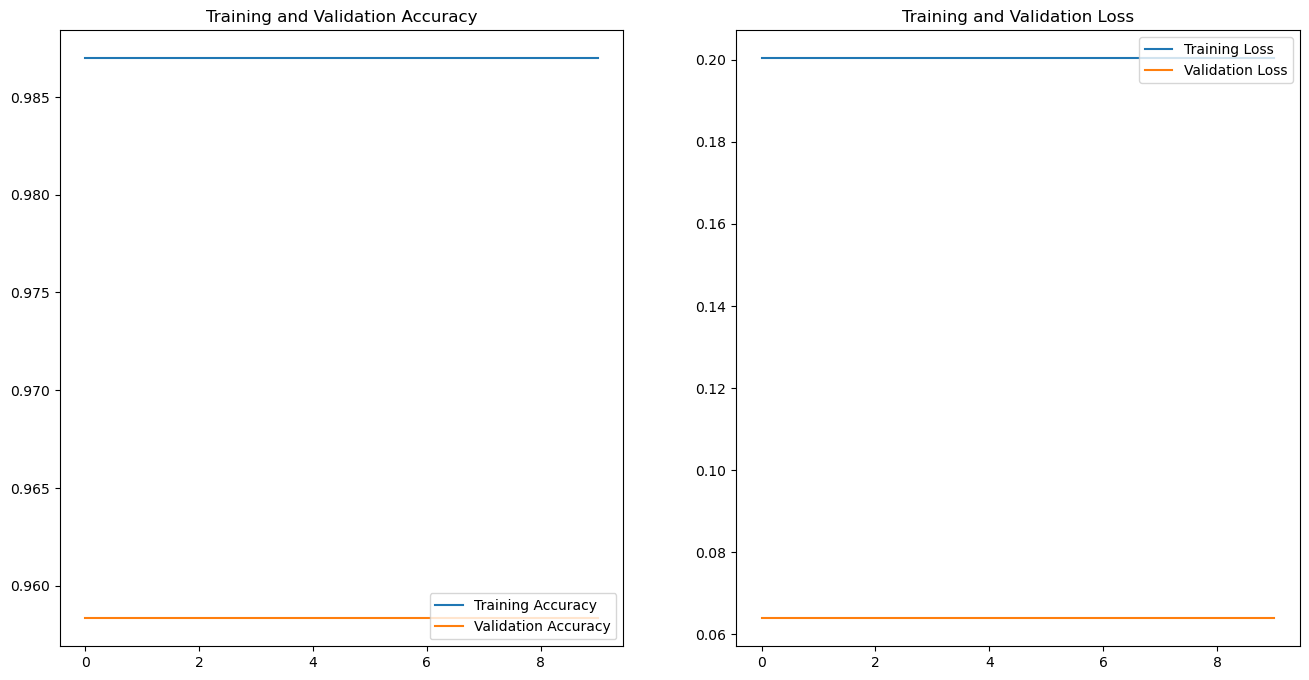

In [21]:
import matplotlib.pyplot as plt

# Training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs_range = range(epochs)

# Plot training and validation accuracy per epoch
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


It can be seen from the line graph that the accuracy of the model after using transfer learning has been greatly improved. The data of Training Accuracy remained stable close to 0.99, while Validation Accuracy also exceeded 0.955. Training Loss also decreased to 0.2, and Validation Loss also decreased to about 0.06. I think this model is relatively successful in training.

### Further fine-tune

This step is still mainly referring to the code given by the teacher.

In [18]:
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=loss_function,
    metrics=["accuracy"],
)

epochs = 10
model.fit(train, epochs=epochs, validation_data=validation)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 5, 5, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 23s 6s/step - loss: 0.2004 - accuracy: 0.9870 - val_loss: 0.06

In [19]:

tf.saved_model.save(model, 'classifer_fine_tuned')


INFO:tensorflow:Assets written to: classifer_fine_tuned\assets


INFO:tensorflow:Assets written to: classifer_fine_tuned\assets


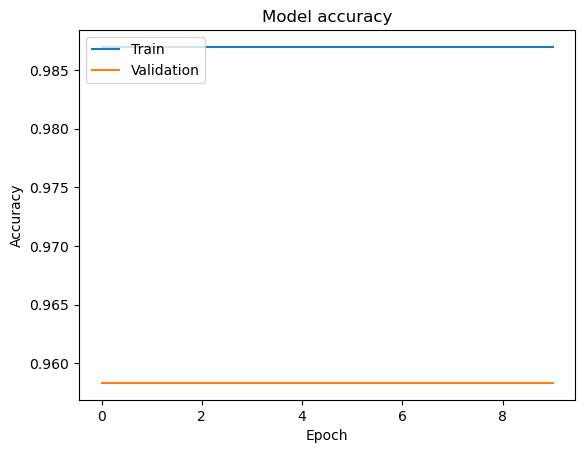

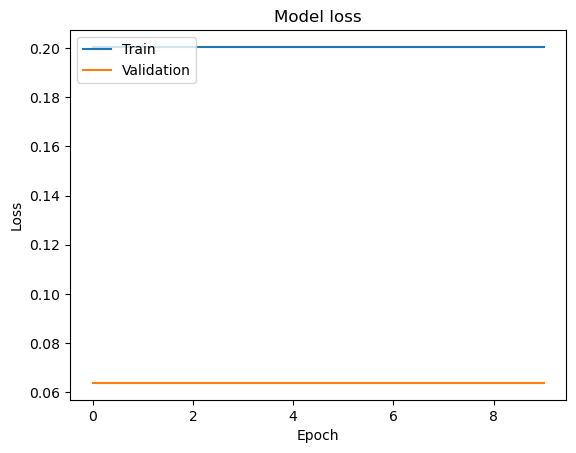

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


The results of a second round of training are almost the same as those after transfer learning. My understanding of this is that the model after transfer learning is already relatively perfect, so there are no difference between them.

### Image classification using Support Vector Machines (SVM)

This code I have done exactly as referenced in this link https://www.kaggle.com/code/ashutoshvarma/image-classification-using-svm-92-accuracy for the purpose of working with CNN and transfer learning results for comparison

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# Create image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

# Load images from directory
image_path = 'C:/Users/廖周航/mycode/John lewis dataset'
train_generator = datagen.flow_from_directory(
    directory=image_path,
    target_size=(117, 156),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)
test_generator = datagen.flow_from_directory(
    directory=image_path,
    target_size=(117, 156),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)




Found 337 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [4]:
# Train SVM model
clf = svm.SVC(kernel='linear')
clf.fit(train_generator[0][0].reshape(len(train_generator[0][0]), -1), np.argmax(train_generator[0][1], axis=-1))

# Test SVM model
accuracy = clf.score(test_generator[0][0].reshape(len(test_generator[0][0]), -1), np.argmax(test_generator[0][1], axis=-1))
print('Accuracy:', accuracy)


Accuracy: 0.8125


In terms of accuracy alone, the accuracy of 0.81 is close to the accuracy results produced by the CNN and is also more stable than the CNN results. However, compared to the accuracy of the model after using transfer learning, it is much worse.

Overall，SVM and CNN are both commonly used for image classification tasks, they have different strengths and weaknesses. But for training my dataset, I prefer to use CNN.

## Image classification using Random Forests

This code was done by referring to the code in kaggle. The problem occurred several times in the step 'Load and preprocess the images' and was solved after asking chatgpt.

Code reference：
https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial


In [21]:
# Import necessary libraries
import os
import numpy as np
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [22]:
# Set path to dataset
data_path = 'C:/Users/廖周航/mycode/John lewis dataset/'

# Create a list to store image data and labels
X = []
y = []


In [23]:
# Load and preprocess the images
for folder_name in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if image_path.endswith('.jpg') or image_path.endswith('.png'):
                image = Image.open(image_path).convert('L')  # Convert image to grayscale
                image = image.resize((117, 156))  # Resize the image to (117, 156)
                image_data = np.array(image).flatten()  # Flatten the image to 1D array
                X.append(image_data)
                y.append(label)

In [25]:
# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Random Forests classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


# Predict on the test set and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)






Accuracy: 0.9166666666666666


The accuracy rate is shown as 0.91. As far as the results are concerned, I think this is a very high accuracy rate. This result is the best result among the single training models. Random Forests, on the other hand, is not specifically designed to do image classification, so I think this result is rather rare, probably because of the relatively small number of data sets I have.

## Image classification using K-Nearest Neighbors (KNN)

The code is completed by reference to the following link.  The code was completed by referring to the following link. kNN was new to me, so I mainly referred to other people's code, mainly to compare the data with other methods of image classification.

Code reference：
https://www.kaggle.com/code/codeblogger/k-nearest-neighbors-knn-classification-75-25
https://medium.com/swlh/image-classification-with-k-nearest-neighbours-51b3a289280

In [28]:
# Import necessary libraries
import os
import numpy as np
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set path to dataset
data_path = 'C:/Users/廖周航/mycode/John lewis dataset/'

# Create a list to store image data and labels
X = []
y = []



In [29]:
# Load and preprocess the images
for folder_name in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if image_path.endswith('.jpg') or image_path.endswith('.png'):
                image = Image.open(image_path).convert('L')  # Convert image to grayscale
                image = image.resize((117, 156))  # Resize the image to (117, 156)
                image_data = np.array(image).flatten()  # Flatten the image to 1D array
                X.append(image_data)
                y.append(label)


In [30]:
# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.84375


C:\APP\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The result shows 0.84, a result that exceeds the accuracy of SVM and is similar to the accuracy of CNN, but lower than the accuracy of Random forests.

### Conclusion

According to the current results, the accuracy of the model after secondary training and transfer learning is the highest at 0.98. After a single training, Random Forests (0.91) > K-Nearest Neighbors (0.84) > Support Vector Machines ( 0.81) / CNN - Keras (0.81)

I think this result was generated on my own dataset, which only has 480 images, so it is unreasonable and not rigorous to use this accuracy to determine which training method is better. With these results, I realise that training a dataset many times over is the only way to train a model with higher accuracy.

## CPPN

Train a CPPN model on = my dataset （including 480 images).Overall it was a failure, as the resulting image was completely black and white and barely related to the images in my dataset. I think it may be because I have too few images in my dataset, or the code itself is wrong.

### Load the images

In [150]:
from PIL import Image
import glob

file_paths = glob.glob("C:/Users/廖周航/mycode/John lewis dataset/*/*.jpg")
images = []
for file_path in file_paths:
    image = Image.open(file_path)
    images.append(image)
    
    
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=117x156>,
 <PIL.Jpeg

### Preprocess the images

In [151]:
import numpy as np

size = (160, 160)
normalized_images = []
for image in images:
    resized_image = image.resize(size)
    normalized_image = np.array(resized_image) / 255.0
    normalized_images.append(normalized_image)


### Create a dataset of input coordinates. 

In [152]:
x = np.linspace(-1, 1, size[1])
y = np.linspace(-1, 1, size[0])
xx, yy = np.meshgrid(x, y)
coordinates = np.stack([xx.flatten(), yy.flatten()], axis=-1)


### Define and train the CPPN model

In [153]:
import tensorflow as tf

# Define the model
inputs = tf.keras.layers.Input(shape=(2,))
x = inputs
for i in range(8):
    x = tf.keras.layers.Dense(32, activation="tanh")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="binary_crossentropy")

# Train the model
batch_size = 32
epochs = 100
for epoch in range(epochs):
    for i in range(0, len(images), batch_size):
        batch_images = normalized_images[i:i+batch_size]
        batch_coordinates = coordinates[i:i+batch_size]
        batch_labels = np.ones((len(batch_images), 1))
        model.train_on_batch(batch_coordinates, batch_labels)
    print("Epoch:", epoch)

# Save the model
model.save("cppn_model.h5")


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99


### Generate new patterns using the trained model

3750/3750 [==============================] - 2s 500us/step


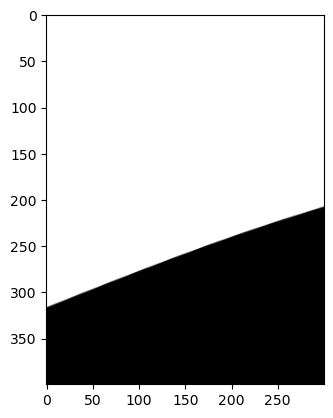

In [154]:
import matplotlib.pyplot as plt

# Generate new patterns
xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 400))
new_coordinates = np.stack([xx.flatten(), yy.flatten()], axis=-1)
new_patterns = model.predict(new_coordinates)

# Reshape the patterns and plot them
new_patterns = new_patterns.reshape((400, 300))
plt.imshow(new_patterns, cmap="gray")
plt.show()


In [155]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model("cppn_model.h5")

# Define the size of the generated image
size = (117, 156)

# Generate a set of coordinates
x = np.linspace(-1, 1, size[1])
y = np.linspace(-1, 1, size[0])
xx, yy = np.meshgrid(x, y)
coordinates = np.stack([xx.flatten(), yy.flatten()], axis=-1)

# Use the model to generate a new pattern
pattern = model.predict(coordinates)
pattern = pattern.reshape(size)

# Convert the pattern to a PIL image and save it
image = Image.fromarray(np.uint8(pattern * 255))
image.save("generated_image.jpg")


571/571 [==============================] - 0s 495us/step


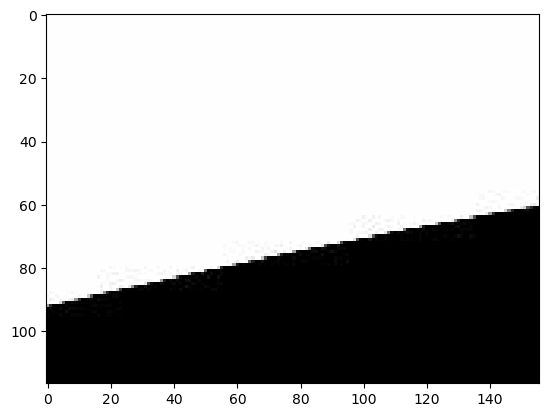

In [156]:
# Load the generated image
image = Image.open("generated_image.jpg")

# Convert the image to a numpy array
array = np.array(image)

# Show the image
plt.imshow(array, cmap="gray")
plt.show()